<a href="https://colab.research.google.com/github/besomlu/stock_study/blob/main/7_%EA%B8%B0%EC%B4%88%EC%9E%90%EC%82%B0%EA%B3%BC_%EC%BB%A4%EB%B2%84%EB%93%9C%EC%BD%9C%EC%9D%98_%EB%B9%84%EA%B5%90_%EA%B7%B8%EB%A0%A4%EB%B3%B4%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Google Colab에서 실행 가능한 파이썬 코드를 만들어줘. 아래 조건을 모두 만족해야 해:

1. 나눔고딕 폰트를 설치하고 폰트매니저에 설치된 폰트를 모두 등록할 것 matplotlib에서 한글이 잘 보이도록 설정할 것
2. FinanceDataReader를 설치하고 사용할 것
3. Tiger미국배당다우존스 티커는 458730 종가를 불러올 것
4. Tiger미국배당다우존스 커버드콜 2호 티커는 458760 종가를 불러올 것
5. 두 종목의 종가 그래프를 그릴 것

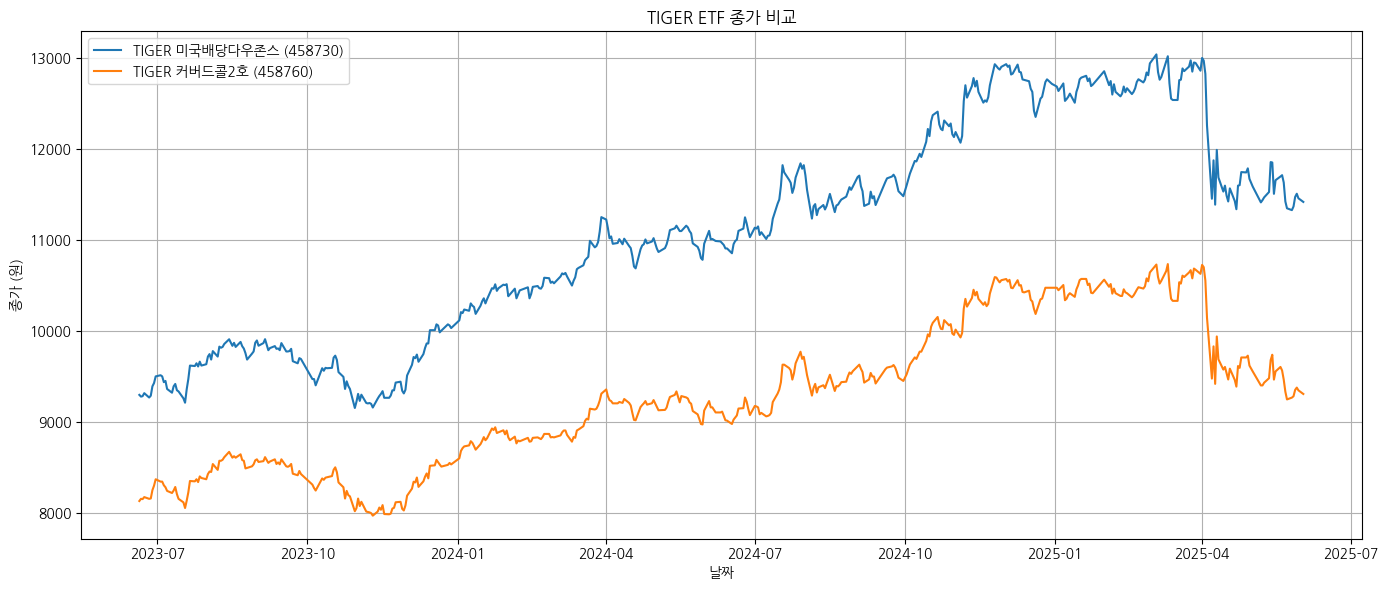

In [2]:
# 1. 나눔고딕 폰트 설치 및 matplotlib 설정
!apt -qq -y install fonts-nanum > /dev/null
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 설치된 나눔 폰트를 matplotlib에 등록
font_dirs = ['/usr/share/fonts/truetype/nanum']
font_files = fm.findSystemFonts(fontpaths=font_dirs)
for font_file in font_files:
    fm.fontManager.addfont(font_file)
plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 깨짐 방지

# 2. FinanceDataReader 설치
!pip install -q finance-datareader

# 3. 데이터 불러오기
import FinanceDataReader as fdr
import pandas as pd

# 티커 사용 (종목명 대신 티커로 직접 불러오기)
df1 = fdr.DataReader('458730')  # TIGER 미국배당다우존스
df2 = fdr.DataReader('458760')  # TIGER 미국배당다우존스커버드콜2호

# 종가만 추출해서 하나의 DataFrame으로 결합
df = pd.DataFrame({
    '미국배당다우존스': df1['Close'],
    '커버드콜2호': df2['Close']
})

# 4. 종가 그래프 그리기
plt.figure(figsize=(14, 6))
plt.plot(df.index, df['미국배당다우존스'], label='TIGER 미국배당다우존스 (458730)')
plt.plot(df.index, df['커버드콜2호'], label='TIGER 커버드콜2호 (458760)')
plt.title('TIGER ETF 종가 비교')
plt.xlabel('날짜')
plt.ylabel('종가 (원)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Google Colab에서 실행 가능한 파이썬 코드를 만들어줘. 아래 조건을 모두 만족해야 해:

1. 나눔고딕 폰트를 설치하고 폰트매니저에 설치된 폰트를 모두 등록할 것 matplotlib에서 한글이 잘 보이도록 설정할 것
2. FinanceDataReader를 설치하고 사용할 것
3. Tiger미국배당다우존스 티커는 458730 종가를 불러올 것
4. Tiger미국배당다우존스 커버드콜 2호 티커는 458760 종가를 불러올 것
5. 두 종목의 상장 첫날 가격 10,000으로 정규화를 하여 종가 그래프를 그릴 것


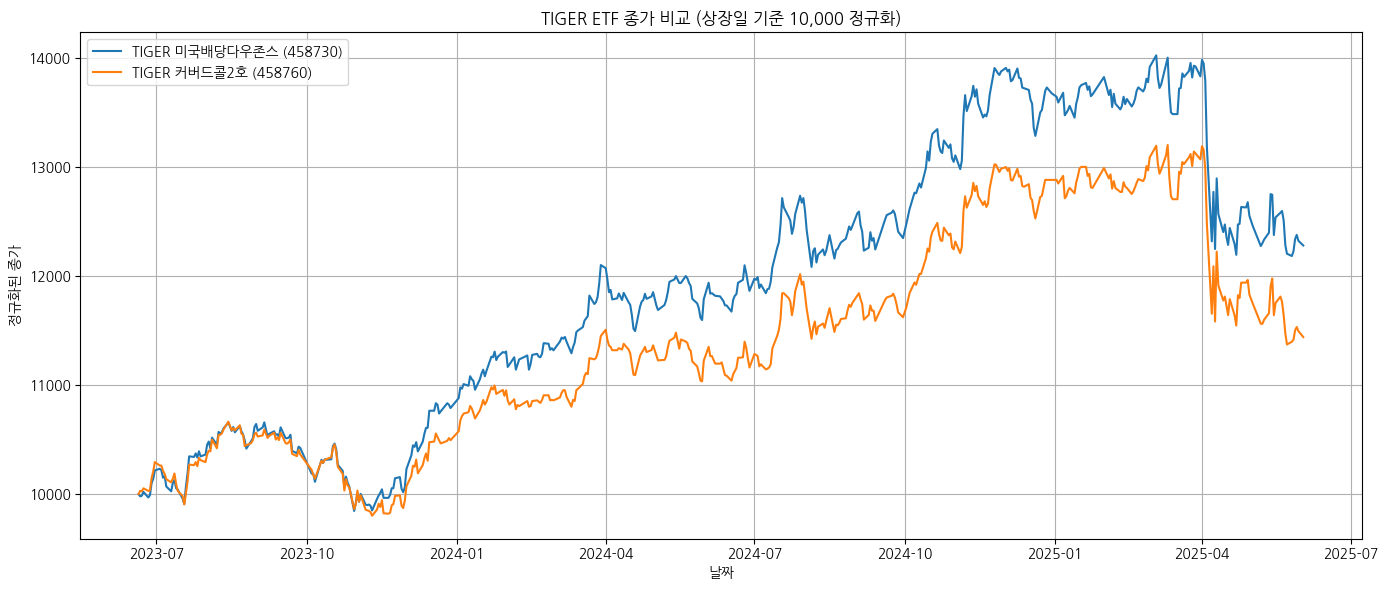

In [3]:
# 1. 나눔고딕 폰트 설치 및 matplotlib 설정
!apt -qq -y install fonts-nanum > /dev/null
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 설치된 폰트 등록
font_dirs = ['/usr/share/fonts/truetype/nanum']
font_files = fm.findSystemFonts(fontpaths=font_dirs)
for f in font_files:
    fm.fontManager.addfont(f)
plt.rc('font', family='NanumGothic')  # 나눔고딕 설정
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 깨짐 방지

# 2. FinanceDataReader 설치
!pip install -q finance-datareader

# 3. 데이터 불러오기
import FinanceDataReader as fdr
import pandas as pd

# 각 종목 티커로 데이터 가져오기
df1 = fdr.DataReader('458730')  # TIGER 미국배당다우존스
df2 = fdr.DataReader('458760')  # TIGER 미국배당다우존스커버드콜2호

# 4. 종가만 추출 후 정규화 (상장 첫날 종가 기준 10,000으로 조정)
df = pd.DataFrame({
    '미국배당다우존스': df1['Close'],
    '커버드콜2호': df2['Close']
})

# 공통으로 존재하는 날짜만 사용 (정렬 및 누락 방지)
df = df.dropna()

# 첫날 종가로 정규화 (기준: 10,000)
normalized_df = df / df.iloc[0] * 10000

# 5. 그래프 그리기
plt.figure(figsize=(14, 6))
plt.plot(normalized_df.index, normalized_df['미국배당다우존스'], label='TIGER 미국배당다우존스 (458730)')
plt.plot(normalized_df.index, normalized_df['커버드콜2호'], label='TIGER 커버드콜2호 (458760)')
plt.title('TIGER ETF 종가 비교 (상장일 기준 10,000 정규화)')
plt.xlabel('날짜')
plt.ylabel('정규화된 종가')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Google Colab에서 실행 가능한 파이썬 코드를 만들어줘. 아래 조건을 모두 만족해야 해:

1. 나눔고딕 폰트를 설치하고 폰트매니저에 설치된 폰트를 모두 등록할 것 matplotlib에서 한글이 잘 보이도록 설정할 것
2. FinanceDataReader를 설치하고 사용할 것
3. Tiger미국배당다우존스 티커는 458730 종가를 불러올 것
4. Tiger미국배당다우존스 커버드콜 2호 티커는 458760 종가를 불러올 것
5. 두 종목의 상장 첫날 가격 10,000으로 정규화를 하여 종가 그래프를 그릴 것
6. 두 종목의 최종가를 y축에 표시할 것

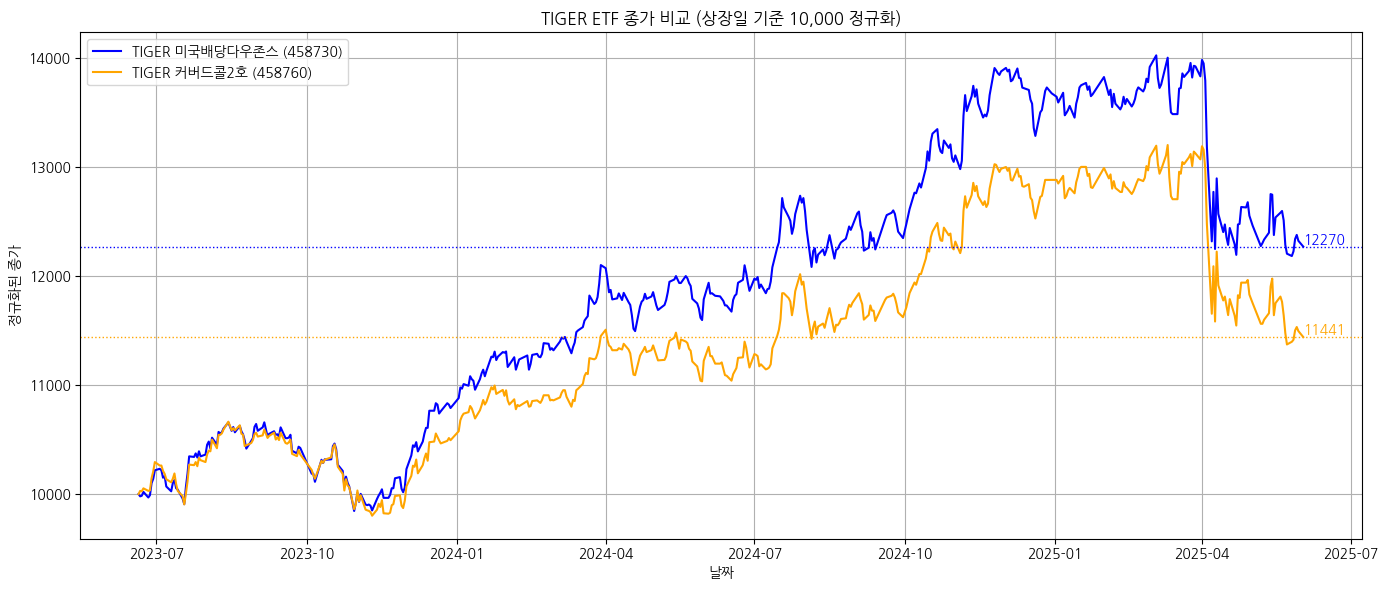

In [5]:
# 1. 나눔고딕 폰트 설치 및 설정
!apt -qq -y install fonts-nanum > /dev/null
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

font_dirs = ['/usr/share/fonts/truetype/nanum']
font_files = fm.findSystemFonts(fontpaths=font_dirs)
for f in font_files:
    fm.fontManager.addfont(f)
plt.rc('font', family='NanumGothic')  # 한글 폰트 설정
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

# 2. FinanceDataReader 설치
!pip install -q finance-datareader

# 3~4. 데이터 불러오기
import FinanceDataReader as fdr
import pandas as pd

df1 = fdr.DataReader('458730')  # TIGER 미국배당다우존스
df2 = fdr.DataReader('458760')  # TIGER 미국배당다우존스커버드콜2호

# 5. 종가 정리 및 정규화
df = pd.DataFrame({
    '미국배당다우존스': df1['Close'],
    '커버드콜2호': df2['Close']
}).dropna()

# 정규화 (첫날 종가 기준 10,000)
normalized = df / df.iloc[0] * 10000

# 6. 그래프 그리기 + 최종가 점선 및 텍스트 표시
plt.figure(figsize=(14, 6))

# 라인 그래프
plt.plot(normalized.index, normalized['미국배당다우존스'], label='TIGER 미국배당다우존스 (458730)', color='blue')
plt.plot(normalized.index, normalized['커버드콜2호'], label='TIGER 커버드콜2호 (458760)', color='orange')

# 최종값 계산
last_val1 = normalized['미국배당다우존스'].iloc[-1]
last_val2 = normalized['커버드콜2호'].iloc[-1]

# 점선 표시 (가로선)
plt.axhline(y=last_val1, color='blue', linestyle='dotted', linewidth=1)
plt.axhline(y=last_val2, color='orange', linestyle='dotted', linewidth=1)

# y축 오른쪽에 텍스트 표시
plt.text(normalized.index[-1], last_val1, f'{last_val1:.0f}', va='bottom', ha='left', color='blue')
plt.text(normalized.index[-1], last_val2, f'{last_val2:.0f}', va='bottom', ha='left', color='orange')

# 기타 그래프 설정
plt.title('TIGER ETF 종가 비교 (상장일 기준 10,000 정규화)')
plt.xlabel('날짜')
plt.ylabel('정규화된 종가')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


두 종목의 종가를 기준으로 상대수익률을 구하려면?

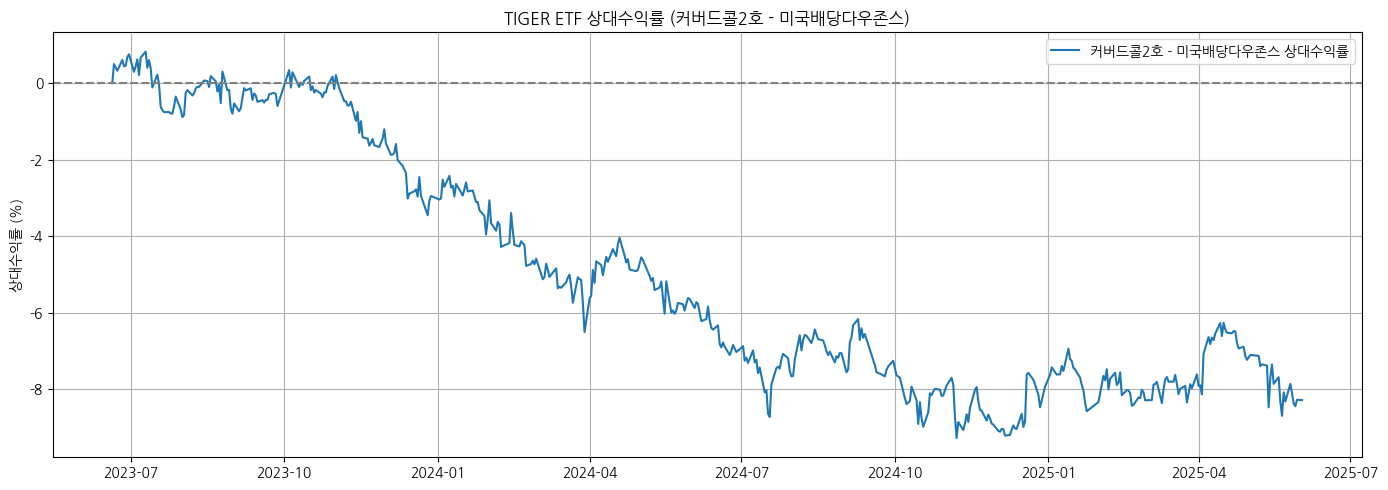

In [8]:
# 기본 데이터 준비
import FinanceDataReader as fdr
import pandas as pd

# 두 ETF 종목의 종가 데이터 불러오기
df1 = fdr.DataReader('458730')  # TIGER 미국배당다우존스
df2 = fdr.DataReader('458760')  # TIGER 미국배당다우존스커버드콜2호

# 종가 기준으로 공통 날짜로 정렬
df = pd.DataFrame({
    '미국배당다우존스': df1['Close'],
    '커버드콜2호': df2['Close']
}).dropna()

# 절대 수익률 계산 (기준: 상장 첫날)
base = df.iloc[0]
absolute_return = df / base - 1

# ✅ 상대수익률 계산
# "커버드콜2호"의 수익률에서 "미국배당다우존스" 수익률을 뺌
relative_return = absolute_return['커버드콜2호'] - absolute_return['미국배당다우존스']

# 결과 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 5))
plt.plot(relative_return.index, relative_return * 100, label='커버드콜2호 - 미국배당다우존스 상대수익률')
plt.axhline(0, color='gray', linestyle='--')
plt.ylabel('상대수익률 (%)')
plt.title('TIGER ETF 상대수익률 (커버드콜2호 - 미국배당다우존스)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


상대수익률의 60일 이동 평균선을 그려줘




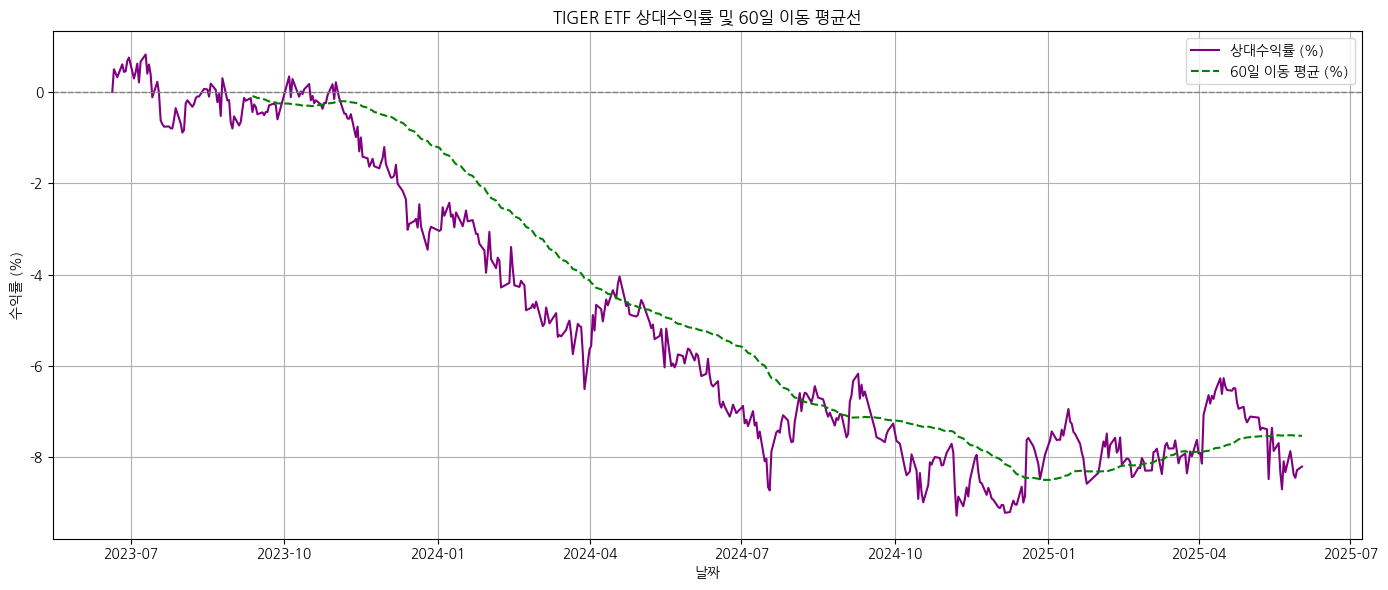

In [9]:
# 1. 폰트 설치 및 설정 (Google Colab 전용)
!apt -qq -y install fonts-nanum > /dev/null
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

font_dirs = ['/usr/share/fonts/truetype/nanum']
font_files = fm.findSystemFonts(fontpaths=font_dirs)
for f in font_files:
    fm.fontManager.addfont(f)
plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

# 2. 패키지 설치
!pip install -q finance-datareader

# 3. 데이터 불러오기 및 전처리
import FinanceDataReader as fdr
import pandas as pd

df1 = fdr.DataReader('458730')  # TIGER 미국배당다우존스
df2 = fdr.DataReader('458760')  # TIGER 미국배당다우존스커버드콜2호

# 공통 종가 데이터프레임 구성
df = pd.DataFrame({
    '미국배당다우존스': df1['Close'],
    '커버드콜2호': df2['Close']
}).dropna()

# 4. 수익률 계산
base = df.iloc[0]
absolute_return = df / base - 1

# 상대수익률: 커버드콜2호 - 미국배당다우존스
relative_return = absolute_return['커버드콜2호'] - absolute_return['미국배당다우존스']

# ✅ 5. 60일 이동 평균선 계산
relative_ma60 = relative_return.rolling(window=60).mean()

# 6. 그래프 시각화
plt.figure(figsize=(14, 6))
plt.plot(relative_return.index, relative_return * 100, label='상대수익률 (%)', color='purple')
plt.plot(relative_ma60.index, relative_ma60 * 100, label='60일 이동 평균 (%)', color='green', linestyle='--')
plt.axhline(0, color='gray', linestyle='dashed', linewidth=1)

plt.title('TIGER ETF 상대수익률 및 60일 이동 평균선')
plt.xlabel('날짜')
plt.ylabel('수익률 (%)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


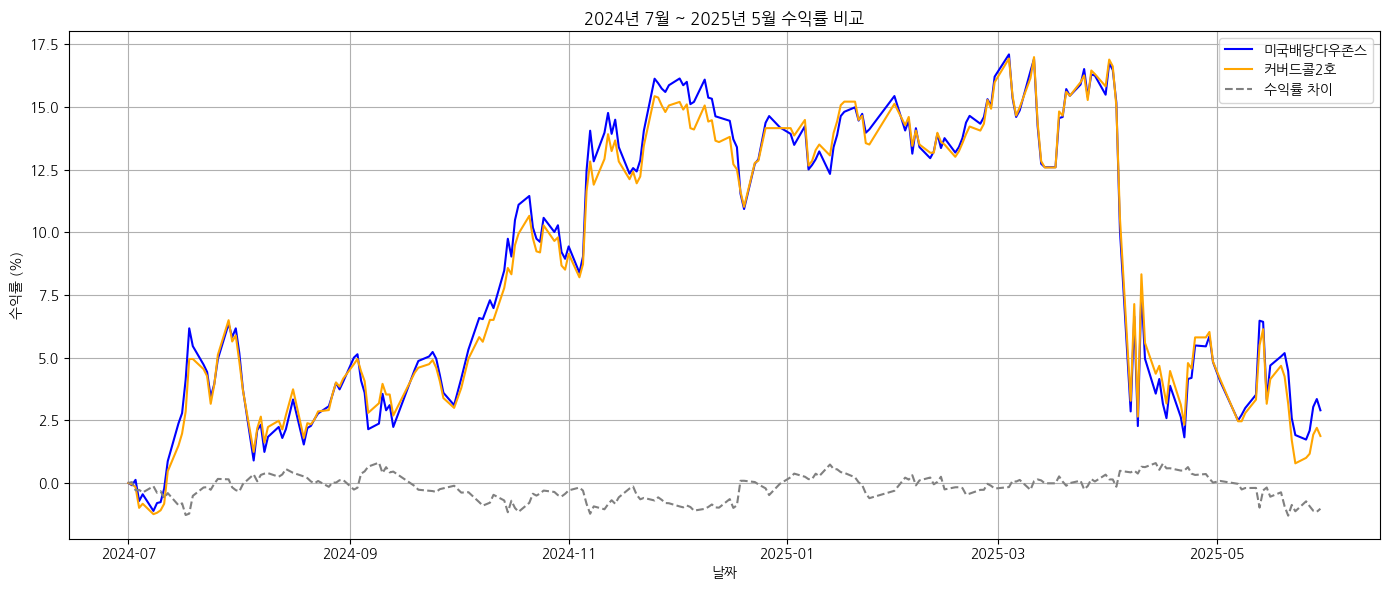

In [11]:
# 1. 나눔고딕 폰트 설치 및 설정
!apt -qq -y install fonts-nanum > /dev/null
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

font_dirs = ['/usr/share/fonts/truetype/nanum']
font_files = fm.findSystemFonts(fontpaths=font_dirs)
for f in font_files:
    fm.fontManager.addfont(f)
plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

# 2. FinanceDataReader 설치
!pip install -q finance-datareader

# 3. 데이터 불러오기 및 기간 설정
import FinanceDataReader as fdr
import pandas as pd

# 분석 기간 설정
start = '2024-07-01'
end = '2025-05-31'

# ETF 종가 불러오기
df1 = fdr.DataReader('458730', start, end)  # TIGER 미국배당다우존스
df2 = fdr.DataReader('458760', start, end)  # TIGER 미국배당다우존스 커버드콜2호

# 4. 공통 종가 데이터프레임 구성
df = pd.DataFrame({
    '미국배당다우존스': df1['Close'],
    '커버드콜2호': df2['Close']
}).dropna()

# 5. 수익률 계산: (현재가 / 시작가 - 1)
base = df.iloc[0]
returns = df / base - 1

# 수익률 차이 계산
diff = returns['커버드콜2호'] - returns['미국배당다우존스']

# 6. 그래프 시각화
plt.figure(figsize=(14, 6))

# 각 종목의 수익률
plt.plot(returns.index, returns['미국배당다우존스'] * 100, label='미국배당다우존스', color='blue')
plt.plot(returns.index, returns['커버드콜2호'] * 100, label='커버드콜2호', color='orange')

# 수익률 차이 (점선)
plt.plot(diff.index, diff * 100, label='수익률 차이', color='gray', linestyle='dashed')

# 그래프 설정
plt.title('2024년 7월 ~ 2025년 5월 수익률 비교')
plt.xlabel('날짜')
plt.ylabel('수익률 (%)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Google Colab에서 실행 가능한 파이썬 코드를 만들어줘. 아래 조건을 모두 만족해야 해:

1. 나눔고딕 폰트를 설치하고 폰트매니저에 설치된 폰트를 모두 등록할 것 matplotlib에서 한글이 잘 보이도록 설정할 것
2. FinanceDataReader를 설치하고 사용할 것
3. Tiger미국배당다우존스 티커는 458730 종가를 불러올 것
4. Tiger미국배당다우존스 커버드콜 2호 티커는 458760 종가를 불러올 것
5. pct_change(250)을 이용해 1년간 수익률을 시계열 그래프로 그릴 것
6. 그래프로 그리는 기간은 2023년 7월부터 2025년 5월까지로 함
7. 수익률의 차이를 함께 그리고 수익률차이의 평균도 함께 표시할 것

fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.


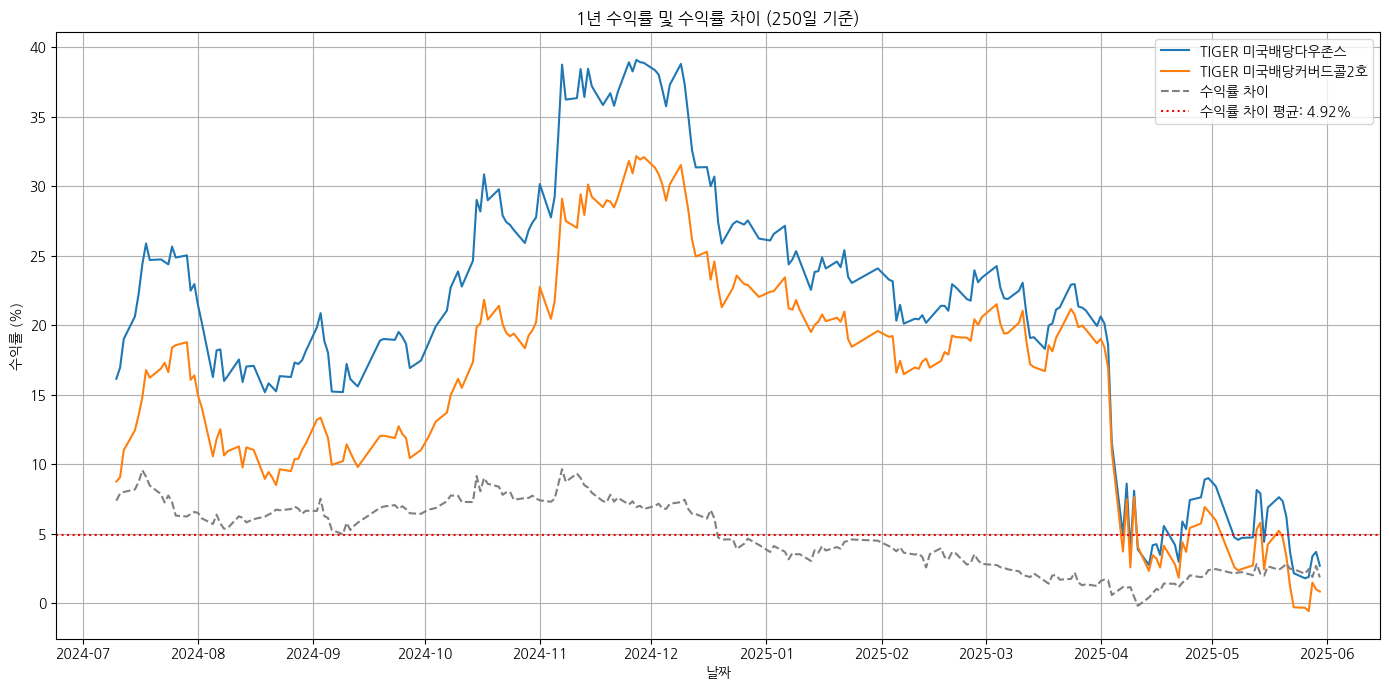

In [22]:
# 1. 나눔고딕 폰트 설치 및 matplotlib 설정
!apt -qq -y install fonts-nanum
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl

# 나눔고딕 폰트 등록
font_paths = fm.findSystemFonts(fontpaths=['/usr/share/fonts/truetype/nanum'])
for path in font_paths:
    fm.fontManager.addfont(path)
plt.rc('font', family='NanumGothic')
mpl.rcParams['axes.unicode_minus'] = False  # 마이너스 깨짐 방지

# 2. FinanceDataReader 설치 및 임포트
!pip install -q finance-datareader
import FinanceDataReader as fdr
import pandas as pd

# 3~4. 종가 데이터 불러오기
start = '2023-07-01'
end = '2025-05-31'

df1 = fdr.DataReader('458730', start, end)[['Close']].rename(columns={'Close': 'TIGER 미국배당다우존스'})
df2 = fdr.DataReader('458760', start, end)[['Close']].rename(columns={'Close': 'TIGER 미국배당커버드콜2호'})

# 5. 250일 수익률 계산
df = pd.concat([df1, df2], axis=1).dropna()
returns = df.pct_change(250) * 100  # 퍼센트 단위

# 6. 수익률 차이 및 평균
returns['수익률 차이'] = returns['TIGER 미국배당다우존스'] - returns['TIGER 미국배당커버드콜2호']
avg_diff = returns['수익률 차이'].mean()

# 7. 그래프 시각화
plt.figure(figsize=(14, 7))
plt.plot(returns.index, returns['TIGER 미국배당다우존스'], label='TIGER 미국배당다우존스')
plt.plot(returns.index, returns['TIGER 미국배당커버드콜2호'], label='TIGER 미국배당커버드콜2호')
plt.plot(returns.index, returns['수익률 차이'], label='수익률 차이', linestyle='--', color='gray')

# 평균선 추가
plt.axhline(y=avg_diff, color='red', linestyle=':', label=f'수익률 차이 평균: {avg_diff:.2f}%')

plt.title('1년 수익률 및 수익률 차이 (250일 기준)')
plt.xlabel('날짜')
plt.ylabel('수익률 (%)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
